In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./tutorial_data/creditcard.csv')[:80000]
print(df.head(3))

X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values


print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')
print(f'Fraud Cases: {y.sum()}')
# unbalanced Dataset (just 196 Fraud Cases in 80.000 entries) (0 = non fraud, 1 = fraud)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]
Shape of X: (80000, 28)
Shape of y: (80000,)
Fraud Cases: 196


In [3]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(class_weight ={0:1, 1:2} ,max_iter=1000) #
mod.fit(X, y).predict(X).sum()

171

In [4]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(class_weight ={0:1, 1:2} ,max_iter=1000) #
mod.fit(X, y).predict(X).sum()

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1, 1:v} for v in range(1,4)]},
    cv = 4
)
grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [5]:
grid_results = pd.DataFrame(grid.cv_results_)
print(grid_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.394206      0.072633         0.005563        0.001752   
1       1.338704      0.671255         0.007093        0.003436   
2       2.441844      0.420996         0.011762        0.004497   

  param_class_weight                          params  split0_test_score  \
0       {0: 1, 1: 1}  {'class_weight': {0: 1, 1: 1}}            0.99405   
1       {0: 1, 1: 2}  {'class_weight': {0: 1, 1: 2}}            0.99025   
2       {0: 1, 1: 3}  {'class_weight': {0: 1, 1: 3}}            0.98730   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0            0.99835            0.99945            0.99780         0.997413   
1            0.99840            0.99960            0.99805         0.996575   
2            0.99845            0.99960            0.99815         0.995875   

   std_test_score  rank_test_score  
0        0.002030                1  
1        0.003697                2  
2 

#### Der Acc-Score ist sehr gut aber vermutlich nur weil es kaum Frauds in den Daten gibt und das Modell das auch predicted
#### Deshalb wäre es sinnvoll eine andere Metrik zu nutzten 

In [21]:
from sklearn.metrics import precision_score, recall_score, make_scorer
def min_recall_precision(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [23]:

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1, 1:v} for v in np.linspace(1, 20, 30)]},
    scoring = {'precision':make_scorer(precision_score), 
                'recall_score':make_scorer(recall_score),
                'min_both':min_recall_precision},
    refit='min_both',
    return_train_score=True, 
    cv = 10
)
grid.fit(X, y)
print(pd.DataFrame(grid.cv_results_))

/Users/simon/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simon/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.318246      0.325115         0.020167        0.003445   
1        1.427041      0.166837         0.025411        0.004908   
2        1.469846      0.215567         0.028566        0.009042   
3        1.644108      0.224719         0.028504        0.003144   
4        1.606700      0.299043         0.034765        0.010470   
5        1.753559      0.222541         0.037300        0.012789   
6        1.704134      0.244933         0.032126        0.006059   
7        1.777392      0.318248         0.032387        0.005590   
8        1.915789      0.357064         0.036764        0.010088   
9        1.788336      0.284592         0.034575        0.008172   
10       1.719324      0.258011         0.036352        0.010647   
11       1.844652      0.330731         0.041707        0.017852   
12       1.716457      0.304725         0.031456        0.006290   
13       1.798060      0.358902         0.033586

In [27]:
df_results = pd.DataFrame(grid.cv_results_)
df_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_both,split3_train_min_both,split4_train_min_both,split5_train_min_both,split6_train_min_both,split7_train_min_both,split8_train_min_both,split9_train_min_both,mean_train_min_both,std_train_min_both
0,1.318246,0.325115,0.020167,0.003445,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.0,0.463415,0.583333,1.0,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,1.427041,0.166837,0.025411,0.004908,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.0,0.463415,0.583333,1.0,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,1.469846,0.215567,0.028566,0.009042,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.0,0.463415,0.583333,1.0,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,1.644108,0.224719,0.028504,0.003144,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.0,0.452381,0.583333,1.0,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,1.606700,0.299043,0.034765,0.010470,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.0,0.452381,0.583333,1.0,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959


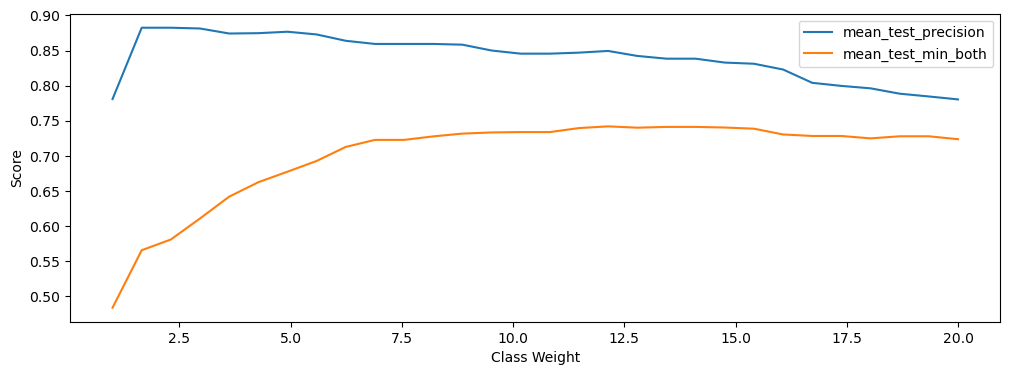

In [31]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in [ 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.xlabel('Class Weight')
plt.ylabel('Score')
plt.legend()